# Perfil de Consumo de Cerveja em São Paulo

## Código da analise dos dados obtidos pelo Forms

#### Descrição: Código tem como objetivo tratar os dados coletados do Forms " https://forms.gle/xppCcDAr8prN2e8cA " e plotar gráficos para o mesmo.

### Importando Bibliotecas

In [1]:
import numpy as np
import plotly.express as px
import folium
import pandas as pd
import matplotlib.pyplot as plt
import re
import requests
import plotly.io as pio
from bs4 import BeautifulSoup
import plotly.graph_objects as go

### Localizando o Data Frame

In [7]:
path = r'C:\Users\Pedro\Documents\Consumo-de-cerveja\PerfilDeConsumo\Perfil de Consumo de Cerveja em São Paulo (respostas) - Respostas ao formulário 1.tsv'

### Importando os dados para o pandas

In [8]:
df = pd.read_csv(path, sep='\t')

In [12]:
df.head()

,Carimbo de data/hora,Você tem mais de 18 anos ?,Você mora no estado de São Paulo ?,Qual tipo de cerveja você consome ?,Quanto o clima influencia no seu consumo de cerveja ?,Com qual frequência você consome cerveja ?,Qual marca comercial você consome ?,Qual marca artesanal você consome ?
0,12/08/2021 10:18:16,Sim,Sim,Cerveja comercial/tradicional,Pouco,Final de semana,"Heineken, Original, Stella Artois","Colorado Ithaca, Eisenbahn 5, Guinness Draught"
1,12/08/2021 10:18:39,Sim,Sim,"Cerveja comercial/tradicional, Cerveja artesanal",Pouco,Ambos,"Heineken, Original, Stella Artois","Colorado Ithaca, Ashby, Eisenbahn 5"
2,12/08/2021 10:21:24,Sim,Sim,"Cerveja comercial/tradicional, Cerveja artesanal",Muito,Final de semana,"Heineken, Original, Stella Artois","Wäls Dubbel, Baden Baden"
3,12/08/2021 12:02:25,Sim,Sim,Cerveja comercial/tradicional,Muito,Ambos,"Heineken, Stella Artois","Eisenbahn 5, Baden Baden"
4,12/08/2021 12:02:26,Sim,Sim,Cerveja artesanal,Muito,Ambos,"Skol, Brahma","Colorado Ithaca, Eisenbahn 5, Baden Baden, Gui..."


### Código do gráfico "Você tem mais de 18 anos ?"

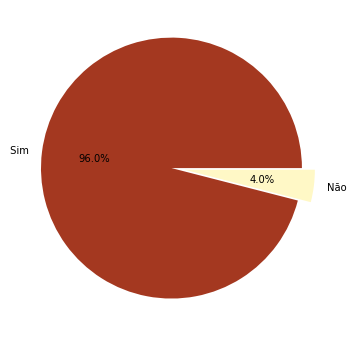

In [10]:
coluna = df['Você tem mais de 18 anos ?']
valor = coluna.value_counts()

total = df['Você tem mais de 18 anos ?'].count()
freq = (valor / total)

plt.figure(figsize=(6,6))
labels = [' Sim', 'Não']
colors = ['#A43820', '#FFF8C6']
explode = (.1, 0)


plt.pie(freq, labels=labels ,  autopct='%1.1f%%',
        colors=colors,
        shadow = False, explode=explode)
plt.savefig('Idade.png')
plt.show()

### Código do Gráfico "Você mora no estado de SP ?"

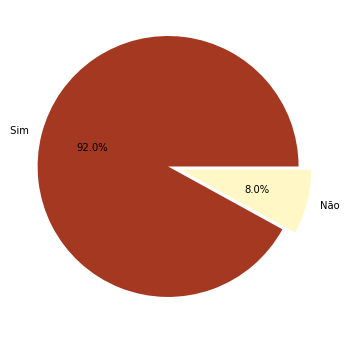

In [56]:
coluna = df['Você mora no estado de São Paulo ?']
valor = coluna.value_counts()

total = df['Você mora no estado de São Paulo ?'].count()
freq = (valor / total)

plt.figure(figsize=(6,6))
labels = [' Sim', 'Não']
colors = ['#A43820', '#FFF8C6']
explode = (.1, 0)


plt.pie(freq, labels=labels ,  autopct='%1.1f%%', 
        colors=colors,
        shadow = False, explode=explode)
plt.savefig('Cidade.png')
plt.show()

### Código do Gráfico "Qual tipo de cerveja você consome ?"

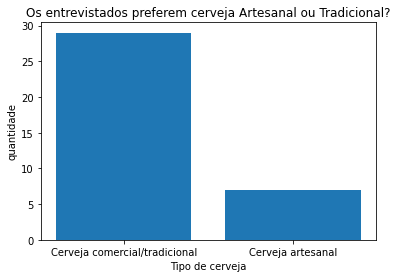

In [14]:
def gerador_de_graficos_forms(path):

    lst_tipo_de_cerveja = list(df['Qual tipo de cerveja você consome ?'])
    lst_tipo_de_cerveja_unique = ['Cerveja comercial/tradicional', 'Cerveja artesanal']

    Cerveja_comercial_tradicional = 0
    Cerveja_artesanal = 0

    for i in lst_tipo_de_cerveja:
        if i == 'Cerveja comercial/tradicional':
                Cerveja_comercial_tradicional +=1
        elif i == 'Cerveja artesanal':
                Cerveja_artesanal += 1
                
    resultados = [Cerveja_comercial_tradicional, Cerveja_artesanal]
# Gráfico sobre opinião dos entrevistados se eles preferem cerveja artesanal ou tradicional
    plt.bar(lst_tipo_de_cerveja_unique, resultados)
    plt.xlabel('Tipo de cerveja')
    plt.ylabel('quantidade')
    plt.title('Os entrevistados preferem cerveja Artesanal ou Tradicional?')
    plt.show()
    
gerador_de_graficos_forms(path)

### Código do Gráfico "Quanto o clima influencia no seu consumo de cerveja ?"

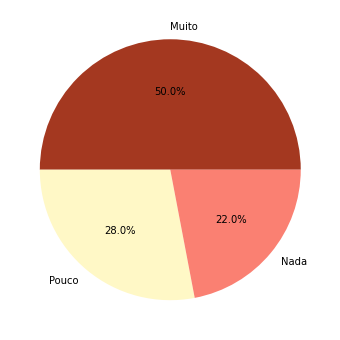

In [26]:
coluna = df['Quanto o clima influencia no seu consumo de cerveja ?']
valor = coluna.value_counts()

total = df['Quanto o clima influencia no seu consumo de cerveja ?'].count()
freq = (valor / total)

plt.figure(figsize=(6,6))
labels = ['Muito', 'Pouco', 'Nada']
colors = ['#A43820', '#FFF8C6', 'Salmon']
explode = (.0, 0, 0)


plt.pie(freq, labels=labels ,  autopct='%1.1f%%', colors=colors,
        shadow = False, explode=explode)
plt.savefig('Clima.png')
plt.show()

### Código do Gráfico"Com qual frequência você consome cerveja ?"

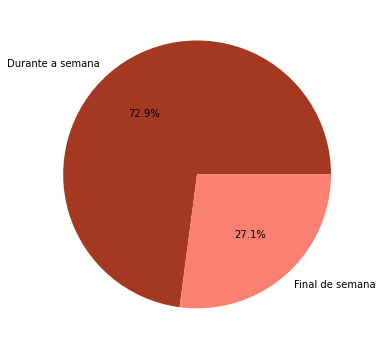

In [45]:
coluna = df['Com qual frequência você consome cerveja ?']
valor = coluna.value_counts()

total = df['Com qual frequência você consome cerveja ?'].count()
freq = (valor / total)

plt.figure(figsize=(6,7))
labels = ['Durante a semana', 'Final de semana']
colors = ['#A43820', 'Salmon']
explode = (.0, 0)


plt.pie(freq, labels=labels ,  autopct='%1.1f%%', colors=colors,
        shadow = False, explode=explode)
plt.savefig('Frequencia.png')
plt.show()

### Código do Gráfico"Qual marca comercial você consome ?"

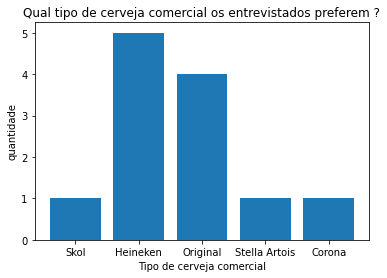

In [51]:
def gerador_de_graficos_forms_comercial(path):

    lst_tipo_de_cerveja_comercial = list(df['Qual marca comercial você consome ?'])
    lst_tipo_de_cerveja_comercial_unique = ['Skol', 'Heineken', 'Original', 'Stella Artois', 'Corona']

    Skol = 0
    Heineken = 0
    Original = 0
    Stella_Artois = 0
    Corona = 0

    for i in lst_tipo_de_cerveja_comercial:
        if i == 'Skol':
                Skol +=1
        elif i == 'Heineken':
                Heineken += 1
        elif i == 'Original':
                Original += 1
        elif i == 'Stella Artois':
                Stella_Artois += 1
        elif i == 'Corona':
                Corona += 1
                
    resultados = [Skol, Heineken, Original, Stella_Artois, Corona]
# Gráfico sobre opinião dos entrevistados de qual cerveja comercial eles preferem
    plt.bar(lst_tipo_de_cerveja_comercial_unique, resultados)
    plt.xlabel('Tipo de cerveja comercial')
    plt.ylabel('quantidade')
    plt.title('Qual tipo de cerveja comercial os entrevistados preferem ?')
    plt.show()
    
gerador_de_graficos_forms_comercial(path)